Analyzing amazon data science books dataset

- Author: Pawan Kumar Shrestha
  
- Date: 26 December 2022

Dataset:

This project uses the Data Science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

To-do List:

1. EDA: Do more expensive books have better review?
   
2. EDA: Do longer book pages have higher pages?

3. What are the best Python and Machine Learning books?

4. Cluster analysis of book names using TF-IDF and K-means

5. Amazon review scraping and book review summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('dataset/amazon-ds-book.csv')
df

In [4]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


Exploratory Data Analysis

Price vs avg_reviews

In [ ]:
px.scatter(df, x='price', y='avg_reviews', size='n_reviews')

Analyzing price with average reviews comes positively. The higher price - has good reviews

Viewing same data in bar plot

In [ ]:
px.scatter(df, x='avg_reviews', y='price')

Best Python Books

In [16]:
# select books based on title containing 'Python'
python_books = df[df['title'].str.contains('Python')]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


Best Machine Learning Book

In [17]:
# select books based on title containing 'Machine Learning'
ml_books = df[df['title'].str.contains('Machine Learning')]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


Clustering book titles

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['title'])

In [24]:
# text vectorization
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.cluster import KMeans

sum_of_squared_distance = []

# Kmeans clustering
K = range(2, 10)
for row in K:
    km = KMeans(n_clusters=row, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

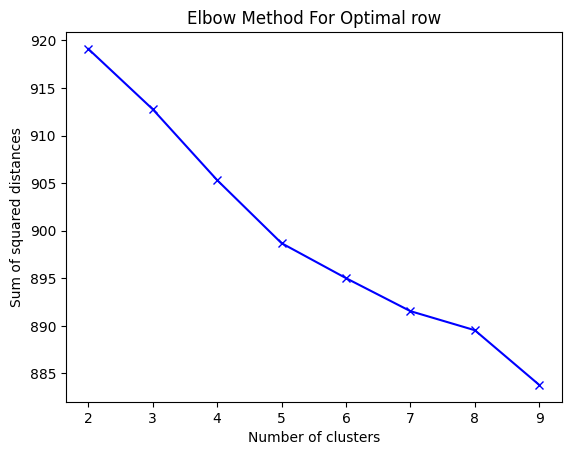

In [26]:
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal row')
plt.show()

In [27]:
# get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df['title'],labels)), columns=['title', 'cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
472  Deep Discourse: A Framework for Cultivating St...        0
736  Web Scraping with Python: Collecting More Data...        0
738            Python Workout: 50 ten-minute exercises        0
739  Real-World Python: A Hackers Guide to Solving ...        0
740  Full-Color Illustration Data Structrues & Algo...        0
..                                                 ...      ...
308  Statistical Rethinking: A Bayesian Course with...        5
205  Supervised Machine Learning for Text Analysis ...        5
115  Data Science (Chapman & Hall/CRC Data Science ...        5
39   Bayesian Ideas and Data Analysis: An Introduct...        5
318  Hierarchical Modeling and Analysis for Spatial...        5

[946 rows x 2 columns]
